## Chloropleth for SICRU model

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np

import matplotlib
from pathlib import Path

In [22]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# EDIT THIS --> get table and add last week fields

In [23]:
##CHANGE THIS TO THE LAST DATE OF THE DATASET
##REPLACE MAY 7TH WITH THE CORRECT DATA NAME

# def add_latestwk(df, stats):
#     for stat in stats:
#         df['%s (May 24th)' % stat] = df.filter(regex=("%s \(w.*" % stat)).apply(lambda x: x.dropna().get(-1, None), axis=1)
#     return df


table_path = Path('/data/schwartzao/covid-sicr/tables/20210311_realtime/')
product_path = Path('/data/schwartzao/covid-sicr/results/')
figures_path = Path('/data/schwartzao/covid-sicr/figures/20210311_realtime/')

df = pd.read_csv(table_path / "fit_table_reweighted.csv")
rois = list(df.roi.unique())

stats = ['Rt', 'car', 'ifr', 'ir', 'ar']
for stat in stats:
    print(stat)
    df[f'{stat} (week 58/March 1-6)'] = 0
    for roi in rois:
        for wk in np.arange(58,0,-1):
    #         print(f"{stat} (week {wk})")
            if df.loc[df.roi==roi][f"{stat} (week {wk})"].notnull().values[0]:
                for q in df['quantile'].unique():
                    df.loc[(df.roi==roi)&(df['quantile']==q),[f'{stat} (week 58/March 1-6)']] = df.loc[(df.roi==roi)&(df['quantile']==q),[f"{stat} (week {wk})"]].values
    #                 print(df.loc[(df.roi==roi)&(df['quantile']==q)]['Rt (May 24th)'].values)
                break

Rt
car
ifr
ir
ar


### get rois

In [24]:
# rename Brazilian states to 2 letter codes
df['roi'] = df['roi'].replace({
            'BR_Acre': 'BR_AC', 
            'BR_Alagoas': 'BR_AL', 
            'BR_Amapa': 'BR_AP', 
            'BR_Amazonas': 'BR_AM',
            'BR_Bahia': 'BR_BA', 
            'BR_Ceara': 'BR_CE', 
            'BR_Distrito Federal': 'BR_DF', 
            'BR_Espirito Santo': 'BR_ES',
            'BR_Goias': 'BR_GO', 
            'BR_Maranhao': 'BR_MA', 
            'BR_Mato Grosso': 'BR_MT',
            'BR_Mato Grosso do Sul': 'BR_MS', 
            'BR_Minas Gerais': 'BR_MG', 
            'BR_Para': 'BR_PA',
            'BR_Paraiba': 'BR_PB', 
            'BR_Parana': 'BR_PR', 
            'BR_Pernambuco': 'BR_PE',
            'BR_Piaui': 'BR_PI', 
            'BR_Rio Grande do Norte': 'BR_RN', 
            'BR_Rio Grande do Sul': 'BR_RS',
            'BR_Rio de Janeiro': 'BR_RJ', 
            'BR_Rondonia': 'BR_RO', 
            'BR_Roraima': 'BR_RR',
            'BR_Santa Catarina': 'BR_SC', 
            'BR_Sao Paulo': 'BR_SP', 
            'BR_Sergipe': 'BR_SE',
            'BR_Tocantins': 'BR_TO'
            })

df = df[df.roi != 'Brazil'] # remove Brazil

In [25]:
rois = list(df.roi.unique())
rois = list(set(rois))

roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)

# AOS ADDED:
roi_br = np.sort([i for i in rois if i[:2]=='BR'])[::-1]

# remove super region means
tmp = []
for roi in rois:
    if not roi.startswith('AA'):
        tmp.append(roi)   
        
rois = tmp

In [44]:
# print(df['ir (week 58/March 1-6)'].max())
# df.nlargest(50, ['ir (week 58/March 1-6)']) 
# df[df['ir (week 58/March 1-6)']]

# print(df.loc[df['roi'] == 'US_TX', 'ir (week 58/March 1-6)'])
# print(df.loc[df['roi'] == 'US_TX', 'quantile'])


# print(df.loc[df['roi'] == 'Indonesia', 'car (week 58/March 1-6)'])
# print(df.loc[df['roi'] == 'Indonesia', 'quantile'])

print(df.loc[df['roi'] == 'CA_BC', 'car (week 58/March 1-6)'])
print(df.loc[df['roi'] == 'CA_BC', 'quantile'])

465    0.017835
466    0.017894
467    0.017925
468    0.017957
469    0.018016
470    0.017925
471    0.000046
Name: car (week 58/March 1-6), dtype: float64
465    0.025
466     0.25
467      0.5
468     0.75
469    0.975
470     mean
471      std
Name: quantile, dtype: object


### make roi dictionaries for cartopy, natural earth

In [32]:
statehash = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [26]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

#get list of all namr type fields

ct = next(countries)

names_ = [i for i in ct.attributes.keys() if 'NAME' in i]
# print(countries)
# print(names_)

# ct1_ = [ct.attributes['NAME_LONG'] for ct in countries]
# countries = reader.records()
# ct2_ = [ct.attributes['NAME'] for ct in countries]
# countries = reader.records()
# ct3_ = [ct.attributes['NAME_ALT'] for ct in countries]
# countries = reader.records()
# for ct in countries:
#     print(ct.attributes['NAME_ALT'])

# print(country.attributes.keys())   
    
# ct_=np.sort(ct_)
    
roi2ct = {}
# for roi in roi_other:
#     for ct in ct_:
# #         print(ct)
#         if roi == ct:
#             roi2ct[roi] = ct
#             break
#         else
            
roi2ct['Burma'] = 'Myanmar'
roi2ct['Korea, South'] = 'Republic of Korea' 
roi2ct['Czechia'] = 'Czech Republic'
roi2ct['North Macedonia'] = 'Macedonia'
roi2ct['Congo (Brazzaville)'] = 'Republic of the Congo'
roi2ct['Congo (Kinshasa)'] = 'Democratic Republic of the Congo'
roi2ct['Taiwan*'] = 'Taiwan'

ct2roi = {v: k for k, v in roi2ct.items()}

### define geoplot function

In [27]:

def geoplot(thetaroot,thetabool,sc,ax,title,cmap,maptype):

#     ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
#     ax.add_feature(cartopy.feature.LAKES, color='b',alpha=0.01)
#     ax.add_feature(cartopy.feature.RIVERS)
    # ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
    
    shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
    shpfilename_us = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_1_states_provinces_lakes_shp')
    shpfilename_br = shpreader.natural_earth(resolution='110m',
                                  category='cultural',
                                  name='admin_1_states_provinces_lakes_shp') # AOS ADDED
    
    
    reader_ct = shpreader.Reader(shpfilename)
    reader_us = shpreader.Reader(shpfilename_us)
    reader_br = shpreader.Reader(shpfilename_br) # AOS ADDED
    
    ctmapped_ = []
    usmapped_ = []
    brmapped_ = [] # AOS ADDED
    
    for roi in roi_other:
        try:
            #find the ct element
            countries = reader_ct.records()
            for cttest in countries:
                for name in names_:
                    if roi == cttest.attributes[name]:
                        ct = cttest
            if roi in roi2ct.keys():
                countries = reader_ct.records()
                for cttest in countries:
                    if roi2ct[roi] == cttest.attributes['NAME_LONG']:
                        ct = cttest
            if thetabool == 0:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot].values[0]
            else:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot + ' (week 58/March 1-6)'].values[0]
            if ct.geometry.type == 'Polygon':
                ct_geo = [ct.geometry]
            else:
                ct_geo = ct.geometry
            ax.add_geometries(ct_geo, maptype, facecolor=cmap(c))
            ctmapped_.append(ct.attributes['NAME_LONG'])
            del(ct)
        except:
#             print(roi) # AOS COMMENTED OUT
            pass
            
            
    countries = reader_ct.records()

    for ct in countries:
        if (ct.attributes['NAME_LONG'] in ctmapped_)==False:
            if ct.geometry.type == 'Polygon':
                ct_geo = [ct.geometry]
            else:
                ct_geo = ct.geometry
            ax.add_geometries(ct_geo, maptype, facecolor='gray')

    for roi in roi_us:
        try:
        #find the ct element
            states = reader_us.records()
            for sttest in states:
                if roi.split('_')[1] == (sttest.attributes['name_alt']).split("|")[0]:
                    st = sttest
                elif len((sttest.attributes['name_alt']).split("|"))>1:
                    if roi.split('_')[1] == (sttest.attributes['name_alt']).split("|")[1]:
                        st = sttest
    #             if roi in roi2ct.keys():
    #                 countries = reader_ct.records()
    #                 for cttest in countries:
    #                     if roi2ct[roi] == cttest.attributes['NAME_LONG']:
    #                         ct = cttest
            if thetabool == 0:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot].values[0]
            else:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot + ' (week 58/March 1-6)'].values[0]
            if st.geometry.type == 'Polygon':
                st_geo = [st.geometry]
            else:
                st_geo = st.geometry
            ax.add_geometries(st_geo, maptype, facecolor=cmap(c))
            usmapped_.append(st.attributes['name_alt'])
            del(st)
        except:
#             print(roi) # AOS COMMENTED OUT
            pass
    states = reader_us.records()
    
    for st in states:
        if (st.attributes['name_alt'] in usmapped_)==False:
#             print(st.attributes['name_alt'])
            if st.geometry.type == 'Polygon':
                st_geo = [st.geometry]
            else:
                st_geo = st.geometry
            ax.add_geometries(st_geo, maptype, facecolor='gray')
            

    for roi in roi_br: # AOS ADDED
        try:
        #find the ct element
            br_states = reader_br.records()
            for sttest in br_states:
                if roi.split('_')[1] == (sttest.attributes['name_alt']).split("|")[0]:
                    st = sttest
#                     print(sttest.attributes['name_alt'])
                elif len((sttest.attributes['name_alt']).split("|"))>1:
                    if roi.split('_')[1] == (sttest.attributes['name_alt']).split("|")[1]:
                        st = sttest
    #             if roi in roi2ct.keys():
    #                 countries = reader_ct.records()
    #                 for cttest in countries:
    #                     if roi2ct[roi] == cttest.attributes['NAME_LONG']:
    #                         ct = cttest
    
            if thetabool == 0:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot].values[0]
            else:
                c = sc*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), thetaroot + ' (week 58/March 1-6)'].values[0]
            if st.geometry.type == 'Polygon':
                st_geo = [st.geometry]
            else:
                st_geo = st.geometry
            ax.add_geometries(st_geo, maptype, facecolor=cmap(c))
            usmapped_.append(st.attributes['name_alt'])
            del(st)
        except:
    #             print(roi) # AOS COMMENTED OUT
            pass

    states_br = reader_br.records()
    
    for st in states_br:
        if (st.attributes['name_alt'] in usmapped_)==False:
    #             print(st.attributes['name_alt'])
            if st.geometry.type == 'Polygon':
                st_geo = [st.geometry]
            else:
                st_geo = st.geometry
            ax.add_geometries(st_geo, maptype, facecolor='gray')

    
    ax.set_title(title+'\n(color scale 0-'+str(1./sc)+', gray=missing data)')
    return 

In [28]:
theta = 'ir' #options are: R, car, ifr, ir, ar

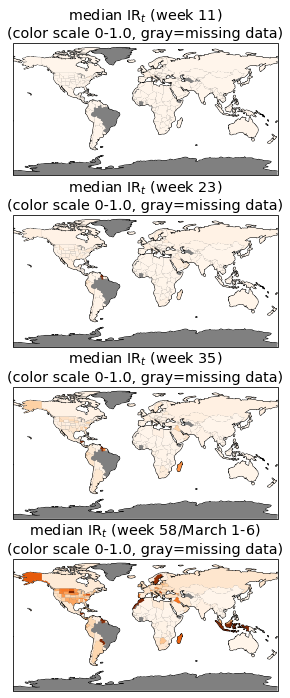

In [36]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

import cartopy.crs as ccrs
maptype = ccrs.PlateCarree()

if theta == 'R':
    fig, ax = plt.subplots(5, 1, subplot_kw=dict(projection=maptype),figsize=(10,10))
else:
    fig, ax = plt.subplots(4, 1, subplot_kw=dict(projection=maptype),figsize=(10,10))



if theta == 'R':
    sc = 0.2
    cmap = matplotlib.cm.get_cmap('Purples')
    geoplot('R0',0,sc,ax[0],r'median R0',cmap,maptype)
    geoplot('Rt (week 11)',0,sc,ax[1],r'median R$_t$ (week 11)',cmap,maptype)
    geoplot('Rt (week 23)',0,sc,ax[2],r'median R$_t$ (week 23)',cmap,maptype)
    geoplot('Rt (week 35)',0,sc,ax[3],r'median R$_t$ (week 35)',cmap,maptype)
    geoplot('Rt',1,sc,ax[4],r'median R$_t$ (week 58/March 1-6)',cmap,maptype)
    plt.subplots_adjust(left=-0.05,right=1.05,top=0.95, hspace = 0.4,bottom=0.05)
    plt.savefig(figures_path/'Geo_Rt_sc{}.png'.format(sc), dpi=200)

if theta == 'car':
    sc = 2
    cmap = matplotlib.cm.get_cmap('Greens')
    geoplot('car (week 11)',0,sc,ax[0],r'median CAR$_t$ (week 11)',cmap,maptype)
    geoplot('car (week 23)',0,sc,ax[1],r'median CAR$_t$ (week 23)',cmap,maptype)
    geoplot('car (week 35)',0,sc,ax[2],r'median CAR$_t$ (week 35)',cmap,maptype)
    geoplot('car',1,sc,ax[3],r'median CAR$_t$ (week 58/March 1-6)',cmap,maptype)
    plt.subplots_adjust(left=-0.05,right=1.05,top=0.95, hspace = 0.3,bottom=0.05)
    plt.savefig(figures_path/'Geo_CARt_sc{}.png'.format(sc), dpi=200)
    
if theta == 'ifr':
    sc=10
    cmap = matplotlib.cm.get_cmap('Reds')
    geoplot('ifr (week 11)',0,sc,ax[0],r'median IFR$_t$ (week 11)',cmap,maptype)
    geoplot('ifr (week 23)',0,sc,ax[1],r'median IFR$_t$ (week 23)',cmap,maptype)
    geoplot('ifr (week 35)',0,sc,ax[2],r'median IFR$_t$ (week 23)',cmap,maptype)
    geoplot('ifr',1,sc,ax[3],r'median IFR$_t$ (week 58/March 1-6)',cmap,maptype)
    plt.subplots_adjust(left=-0.05,right=1.05,top=0.95, hspace = 0.3,bottom=0.05)
    plt.savefig(figures_path/'Geo_IFRt_sc{}.png'.format(sc), dpi=200)  
    
if theta == 'ir':
    sc=1
    cmap = matplotlib.cm.get_cmap('Oranges')
    geoplot('ir (week 11)',0,sc,ax[0],r'median IR$_t$ (week 11)',cmap,maptype)
    geoplot('ir (week 23)',0,sc,ax[1],r'median IR$_t$ (week 23)',cmap,maptype)
    geoplot('ir (week 35)',0,sc,ax[2],r'median IR$_t$ (week 35)',cmap,maptype)
    geoplot('ir',1,sc,ax[3],r'median IR$_t$ (week 58/March 1-6)',cmap,maptype)
    plt.subplots_adjust(left=-0.05,right=1.05,top=0.95, hspace = 0.3,bottom=0.05)
    plt.savefig(figures_path/'Geo_IRt_sc{}.png'.format(sc), dpi=200)
    
if theta == 'ar':
    sc=4
    cmap = matplotlib.cm.get_cmap('Blues')
    geoplot('ar (week 11)',0,sc,ax[0],r'median AR$_t$ (week 11)',cmap,maptype)
    geoplot('ar (week 23)',0,sc,ax[1],r'median AR$_t$ (week 23)',cmap,maptype)
    geoplot('ar (week 35)',0,sc,ax[2],r'median AR$_t$ (week 35)',cmap,maptype)
    geoplot('ar',1,sc,ax[3],r'median AR$_t$ (week 58/March 1-6)',cmap,maptype)
    plt.subplots_adjust(left=-0.05,right=1.05,top=0.95, hspace = 0.3,bottom=0.05)
    plt.savefig(figures_path/'Geo_ARt_sc{}.png'.format(sc), dpi=200)
    